In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### `Load dataset and do some inital cleaning`

In [2]:
popular_moves = pd.read_csv('Top_10000_Movies.csv',  lineterminator='\n')

In [3]:
popular_moves_df = popular_moves.drop("Unnamed: 0",axis=1)
popular_moves_df = popular_moves_df.fillna(0)

#### will be easier to work with the date in datetime format and with a year column

In [4]:
popular_moves_df['release_date'] =  pd.to_datetime(popular_moves_df['release_date'])
popular_moves_df['year'] = popular_moves_df['release_date'].dt.year.astype(int)

## This dataset has information about the top 10,000 Popular movies based on IMDB ratings.

### The dataset has following fields:

#### `id: every movie has a unique ID` <br /><br />  `original_language`<br /><br />`original_title`<br /><br />`popularity: the bigger the number, the higher the popularity`<br /><br />`release_date`<br /><br />`vote_average`<br /><br />`vote_count`<br /><br />`genre`<br /><br />`overview`<br /><br />`revenue`<br /><br />`runtime: in minutes`<br /><br />`tagline`

In [5]:
len(popular_moves_df)

10000

### URL to this dataset: https://www.kaggle.com/omkarborikar/top-10000-popular-movies
### To download it, click the download button on the top right of the website

### Some interesting questions we can answeer with this dataset: <br /><br /> 1) Are there genre(s) that tend to be more popular? <br /><br /> 2) Does a higher number of ratings correlate with higher revenue? <br /><br /> 3) Are there multiple movies with the same title? <br /><br /> 4) Does the movie with the highest revenue also have the highest popularity?  <br /><br /> 5) Since this data is taken from the American IMDB website, after English, what other original languages of movies are most popular?

#### for instance, to answer question #3: 

In [6]:
popular_moves_df['original_title'].nunique()

9756

#### there are 244 movies in this dataset that share the same name.

### `describe the dataset`

In [7]:
popular_moves_df.describe()

,id,popularity,vote_average,vote_count,revenue,runtime,year
count,10000.0000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.0000,10000.000000
mean,250053.0833,34.516871,6.29875,1315.084900,5.736388e+07,98.6847,2007.376000
std,261734.6183,100.693958,1.43426,2501.899103,1.480771e+08,28.9396,14.818339
min,5.0000,6.269000,0.00000,0.000000,0.000000e+00,0.0000,1902.000000
25%,11866.7500,11.908000,5.90000,118.000000,0.000000e+00,89.0000,2002.000000
50%,144476.0000,17.488000,6.50000,425.500000,5.912300e+05,99.0000,2012.000000
75%,451485.0000,29.626250,7.10000,1297.250000,4.764549e+07,113.0000,2018.000000
max,893478.0000,5401.308000,9.50000,30184.000000,2.847246e+09,400.0000,2028.000000


### `array of columns`

In [8]:
popular_moves_df.columns

Index(['id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline', 'year'],
      dtype='object')

### `index array`

In [9]:
popular_moves_df.index.array

<PandasArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
 ...
 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999]
Length: 10000, dtype: int64

### `plot`

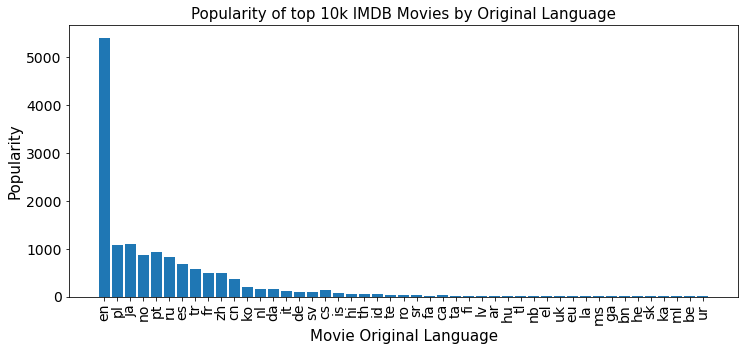

In [10]:
fig = plt.figure(figsize = (12, 5))
plt.xlabel("Movie Original Language", size=15)
plt.ylabel("Popularity", size =15)
plt.title("Popularity of top 10k IMDB Movies by Original Language", size=15)
lang = list(popular_moves_df['original_language'])
pop = list(popular_moves_df['popularity'])
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.bar(lang, pop)
plt.show()

### filter out english to get a better look at the other original languages

In [11]:
without_english = popular_moves_df[popular_moves_df['original_language']!='en']

In [12]:
without_english_df = without_english.sort_values('popularity', ascending=False)

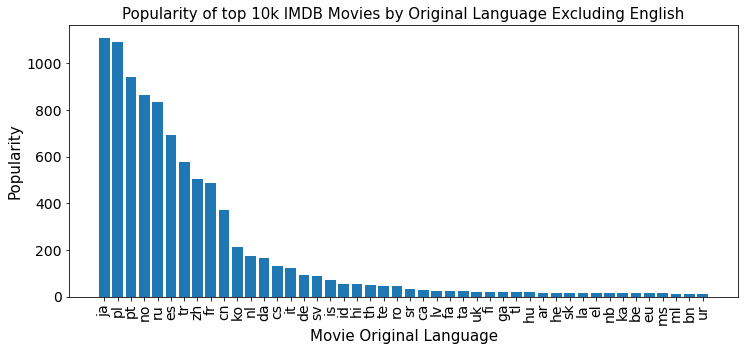

In [13]:
fig = plt.figure(figsize = (12, 5))
plt.xlabel("Movie Original Language", size=15)
plt.ylabel("Popularity", size =15)
plt.title("Popularity of top 10k IMDB Movies by Original Language Excluding English", size=15)
lang = list(without_english_df['original_language'])
pop = list(without_english_df['popularity'])
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.bar(lang, pop)
plt.show()

<AxesSubplot:>

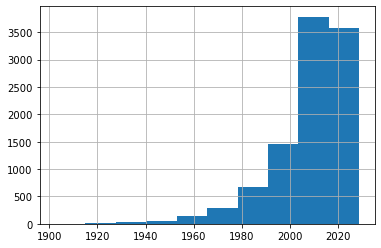

In [15]:
popular_moves_df['release_date'].hist()

### `pivot table and plot`

In [16]:
column = 'popularity'

pop_movies_pvt = pd.pivot_table(popular_moves_df, values=column, index=["year"], columns=["original_language"])
pop_movies_pvt

original_language,ar,be,bn,ca,cn,cs,da,de,el,en,...,sr,sv,ta,te,th,tl,tr,uk,ur,zh
year,,,,,,,,,,,,,,,,,,,,,
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.258,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.428,NaN,9.528000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.377000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.763000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.526935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.126625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.943000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'popularity')

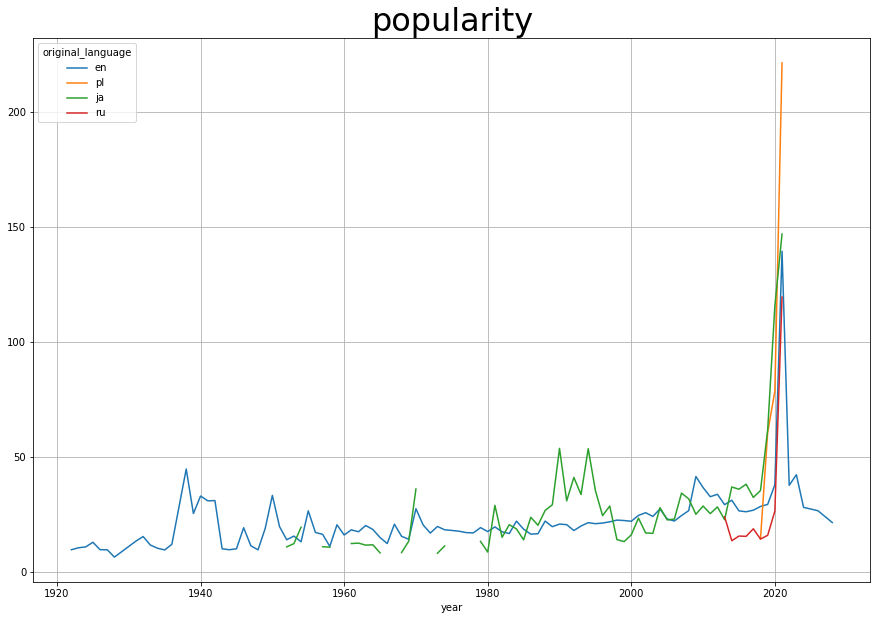

In [17]:
pop_movies_pvt[['en', 'pl', 'ja', 'ru']].plot(figsize=(15,10))
plt.grid()
plt.title(column,fontsize=32)

### `groupby`

In [18]:
popular_moves_df['year'].max()

2028

### In doing a groupby by year, first I will filter the dataset to only include movies that have already been released since there will be data on them — this dataset includes movies with a future release date up until 2028.

In [19]:
released_df = popular_moves_df[popular_moves_df['year'] <= 2021]
released_df.groupby(['year']).mean().round(2).drop("id", axis=1)

,popularity,vote_average,vote_count,revenue,runtime
year,,,,,
1902,12.47,8.00,1223.00,0.00,14.00
1920,9.26,7.90,1019.00,8811.00,77.00
1922,10.98,7.40,762.00,9527.00,86.50
1923,10.38,7.90,303.00,1500000.00,74.00
1924,10.76,8.20,605.00,0.00,45.00
...,...,...,...,...,...
2017,26.67,6.41,1293.41,52030989.66,100.69
2018,26.45,6.43,1119.11,49490763.83,101.15
2019,29.29,6.65,976.17,48834697.28,101.42


### `discussion`

- Based on the columns of the dataset, the first piece of analysis I did was seeing if there were any movies in the dataset that share the same name. Answering this question only required a .nunique() call on the original_title column, to find out there were 244 movies with the same original titile. 
- The first plot I made was to visualize the popularity of movies by their original language. I expected English to be the most popular by far, since IMDB is an English/American company, and the plot confirmed this. 
- I was then interested to see which languages of movies are popular in the U.S., after English. To answer this question I filtered the dataframe by if the item in the original_language column was not English, and replotted. The resulting plot showed that the next 3 most popular movie languages were Japanese, Polish, and Portuguese. I expected the next most popular language to be Japanese given the recent rise of Anime popularity, but I was expecting the next popular language to be Spanish, so the Polish and Portuguese was interesting.
- I also made a simple histogram of the release_date column, which confirmed by expectation that there are many more movies in this IMDB dataset in more recent years. In particular, we see a steep increase around the year 2000 of movies in the dataset. This makes sense with the rise of popular culture and an increase in movie technology.
- For the pivot table, the column which was used for the statistical summary was popularity, the index was release year, and the column used for aggregating the values was original_language.
- I chose the English, Japanese, Polish, and Russian columns to plot from the pivot table. The plot shows the rise in popularity of the non-English movies around the mid 2000s, which makes sense. We see the rise of popularity of Japenese movies was much earlier than the other non-English language movies.
- I used the groupby feature to group by 'year', and took the mean of the other columns. From this, we can see the average popularity and revenue were generally higher for movies released in more recent years than in the earlier years around the early 1900s. We can also see an increase in the average runtime of more recent movies, which also makes sense with the rise of more advanced movie technology.